In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import waverider as wrdr
import config as cfg
from config_modify import modify_config

In [13]:
cfg.CONFIG = {
    "Altitude [km]": 33.4,
    "Density [kg/m^3]": 0.010864279396722926,
    "Dynamic Viscosity [Ns/m^2]": 1.5051532347594733e-05,
    "Mach": 5.0,
    "Number of Points": 800,
    "Optimization Parameter": "L/D",
    "Planes": 80,
    "Pressure [Pa]": 723.7741536850451,
    "Temperature [K]": 232.0811914150587,
    "Type of Problem": "Maximization",
    "Viscous Method": "Ref. Temperature"
}
modify_config()

In [14]:
wr_in = {
    "b": 18.056262690116643,
    "s": 33.195353512213124,
    "l": 79.99994760609384,
    "per_l": 0.20000004898783563,
    "yle": [
        5.577090436069006,
        7.153491258236458,
        28.47187820394068
    ],
    "zle": [
        17.96887835524319,
        14.446383541177944
    ]
}

wr = wrdr.Waverider(wrdr.WRInputs(**wr_in))

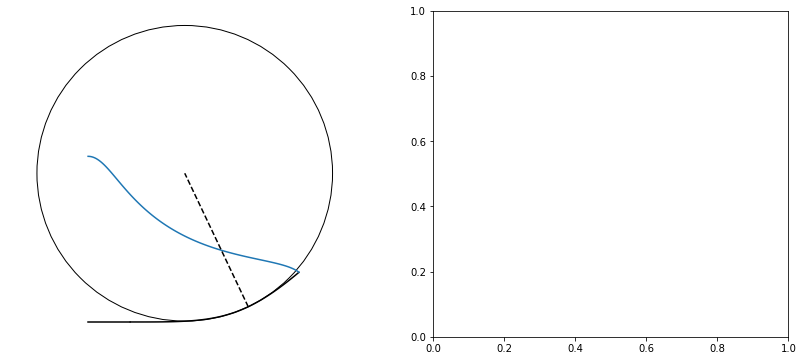

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
for sw in wr.SW:
    sw.plot(ax1, color='k')
wr.LE.plot(ax1)

plane = 60
sw_plane = plane - wr.Cones_cache['PLANES_L']
t = wr.Cones_cache['tsw_c'][sw_plane]
radius = wr.SW[1].radius_curv(t)
center = (
    wr.SW[1].curve('y', t) - np.cos(wr.SW[1].normal_phi(t)) * radius,
    wr.SW[1].curve('z', t) - np.sin(wr.SW[1].normal_phi(t)) * radius
)
wr.SW[1].plot_radius(t, ax1, '--k')

ax1.axis('equal')
ax1.invert_yaxis()
ax1.set_axis_off()
